# Psychoinformatics - Week 15 (Exercises)
李采蓉 b08207042@ntu.edu.tw

## 1 Face Detection (4 points)
Please use one face detection method/package of your choice to see if you can detect the faces in the following two pictures:

<img src="https://www.kindpng.com/picc/m/28-286422_smiley-face-clip-art-human-face-cartoon-boy.png" width=20%>
<img src="https://i.imgur.com/zESfT.jpg" width=20%>

If so, why? If not, why not? 

Remember to explore the model parameters to make your conclusions parameter-independent.

### Haar-Cascade
資料來源：https://realpython.com/face-recognition-with-python/

In [296]:
import urllib.request
import cv2
import matplotlib.pyplot as plt

#### 卡通男孩

In [59]:
urllib.request.urlretrieve('https://www.kindpng.com/picc/m/28-286422_smiley-face-clip-art-human-face-cartoon-boy.png', 'boy.png')
boy = cv2.imread('boy.png')
boy_gray = cv2.cvtColor(boy_re, cv2.COLOR_BGR2GRAY)

In [111]:
# Get user supplied values
cascPath_face = "haarcascade_frontalface_default.xml"
cascPath_eye = "haarcascade_eye.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath_face)
eyeCascade = cv2.CascadeClassifier(cascPath_eye)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    boy_gray,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(150, 150),
    flags = cv2.CASCADE_SCALE_IMAGE
)

eyes = eyeCascade.detectMultiScale(
    boy_gray,
    scaleFactor=1.02,
    minNeighbors=1,
    minSize=(40,40),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print("Found {0} faces!".format(len(faces)))
print("Found {0} eyes!".format(len(eyes)))

Found 1 faces!
Found 1 eyes!


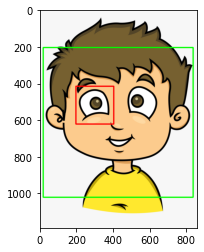

In [112]:
# Draw a rectangle around the faces
boy_re = cv2.cvtColor(boy,cv2.COLOR_BGR2RGB)
for (x, y, w, h) in faces:
    cv2.rectangle(boy_re, (x, y), (x+w, y+h), (0, 255, 0), 5)
    
for (x, y, w, h) in eyes:
    cv2.rectangle(boy_re, (x, y), (x+w, y+h), (255, 0, 0), 5)

plt.imshow(boy_re)

#### 雲中臉

In [297]:
urllib.request.urlretrieve('https://i.imgur.com/zESfT.jpg', 'cloud.jpg')
cloud = cv2.imread('cloud.jpg')
cloud_gray = cv2.cvtColor(cloud, cv2.COLOR_BGR2GRAY)

In [298]:
# Get user supplied values
cascPath_face = "haarcascade_frontalface_default.xml"
cascPath_eye = "haarcascade_eye.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath_face)
eyeCascade = cv2.CascadeClassifier(cascPath_eye)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    cloud_gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(150, 150),
    flags = cv2.CASCADE_SCALE_IMAGE
)

eyes = eyeCascade.detectMultiScale(
    cloud_gray,
    scaleFactor=1.09,
    minNeighbors=35,
    minSize=(50,50),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print("Found {0} faces!".format(len(faces)))
print("Found {0} eyes!".format(len(eyes)))

Found 1 faces!
Found 2 eyes!


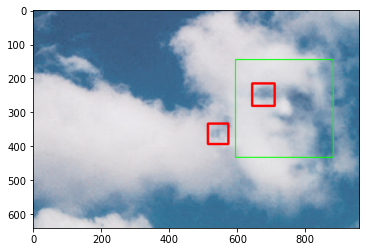

In [130]:
# Draw a rectangle around the faces
cloud_re = cv2.cvtColor(cloud,cv2.COLOR_BGR2RGB)
for (x, y, w, h) in faces:
    cv2.rectangle(cloud_re, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
for (x, y, w, h) in eyes:
    cv2.rectangle(cloud_re, (x, y), (x+w, y+h), (255, 0, 0), 5)

plt.imshow(cloud_re)
# 眼睛是在騙இ௰இ

CascadeClassifier是一種非常耗時的分類器(真的很久)，其原理是以固定大小的窗口在圖片上滑動檢測。官網上已經有一系列訓練好的模型，除了臉之外還有眼睛、嘴巴、身體...等，我就毫不客氣地使用了。

這次用了正面人臉(haarcascade_frontalface)和眼睛(haarcascade_eye)，臉的話因為只回傳臉的範圍沒有像MTCNN一樣有詳細五官位置，所以從結果只能大致定案說有抓到。這裡值得一提的是"卡通男孩"的臉其實不太算有被真正抓到，當時調參數時直到minNeighbor=1(每個候選矩形保留的相鄰矩形數)才有這個結果，預設值是3，所以算放水才過，卡通人物的臉在我們的認知中可以對應到「人有鼻子、眼睛、嘴巴」的陳述，加上每個物件位置跟人類臉部比例相似，因此身為人在心中對人類有既定表象比例範圍時可以輕易判斷，但分類器這些演算法就很吃丟進去訓練的資料集，胡亂推測當初丟進去的訓練資料應該都是使用「真人的臉」，才使"卡通男孩"的臉在很初期就被判定成"非臉"。至於"雲中臉"的話最一開始minNeighbor設3就過了，為了加強驗證才稍微提高到35。

至於眼睛的檢測，可能是因為一格一格抓，所以像是"雲中臉"裡對比度較高的小塊區域都很容易被誤認成眼睛(minNeighbor甚至都調到35才篩剩下兩個)，除此之外可以發現臉和眼睛對不太起來，可能因為格子設小了，加上設太嚴，所以雲中臉的右眼被排除，而那個臉以外的洞洞形似眼睛，所以被保留下來。

胡亂murmur(截自我自己的fb):
    
基本上就算是卡通人物的臉，人在看到後FFA也會有反應<br>
但就到目前為止網路上抓抓的人臉辨識模型來說<br>
基本上就真的只能針對"真人"的臉<br>
意思是指五官介在特定比例之間<br>
除非我把判定的閾值調到最低(大概是minNeighbor=1)<br>
卡通人臉才會被接受<br>

前兩天朱李有一則限動是維思在認小朱畫在紙上的動物<br>
更早之前有幾則是維思去動物園認出很多動物<br>
(維思是個還沒滿兩歲的可愛寶寶<3)<br>
人腦真的蠻神奇的，儘管在發育早期接收到不完全正確的2D形象<br>
有時顏色甚至對不上<br>
但在看到實際3D活生生動物時<br>
依舊能夠推論出形象類似甚至是正確的答案<br>

反之亦然，讓小朋友去畫家人們<br>
不外乎都會得到圓圓的臉、兩個眼睛一個嘴巴、軀幹手腳<br>
(鼻子就不一定有了我也不知道為甚麼)<br>
更進一步的推論<br>
寶寶們抓到的特徵大致上就是兩個眼睛一個嘴巴還有近似圓的頭<br>
對於"人臉"的判定，無論是現實是卡通，很早就建立<br>

林品言有找到判別"卡通人物"的臉的模型<br>
這讓我生出很大的疑惑<br>
1. 難道就沒有人把真人和卡通的臉混在一起訓練嗎?<br>
(用GAN生成10000張妹圖和真妹子放在一起的那種)
2. 撇開FFA層級，從population的層面去觀察神經活化。假若已知真人臉的辨識集中於A, B, C, D, E, F, G, H這些細胞，那麼看到妹圖能夠成功辨認誰是誰，活化的是否是跟辨認真人臉的是同一群?<br>
3. 承2.，如果是同一群細胞，那麼人在判定圖中物體是否屬於"人的範疇"時，利用的到底是"個體意義"的連結，還是單單只利用了臉部五官是否存在和比例有一定協調性等表象特徵?
(這部份感覺需要DTI啊)

## 2 Audio Segementation (4 points) 
Please use one audio/speech segementation method of your choice (including your own codes) to calculate:

[1] the number of segments, and <br>
[2] the total speech duration of all the segments (seconds)

of each .wav file in https://ceiba.ntu.edu.tw/course/4671ea/content/speech.zip .

In the following example, there are 5 segements and the total speech duration is the sum of yellow(+blue) periods.

<img src="https://www.irit.fr/recherches/SAMOVA/assets/images/segmentation3.gif">

In [4]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

### happy

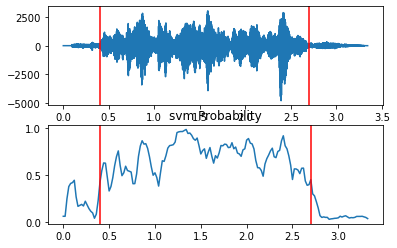

共分成 1 段
 [[0.4, 2.7]]
講話時長共 2.3000000000000003 秒


In [158]:
[Fs, x] = aIO.read_audio_file("speech/happy/51_F_H_6.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.3, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

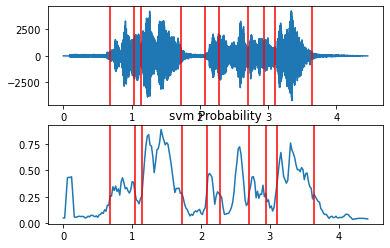

共分成 5 段
 [[0.68, 1.04], [1.1400000000000001, 1.72], [2.08, 2.2800000000000002], [2.7, 2.94], [3.1, 3.64]]
講話時長共 1.92 秒


In [159]:
[Fs, x] = aIO.read_audio_file("speech/happy/53_F_H_6.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.3, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

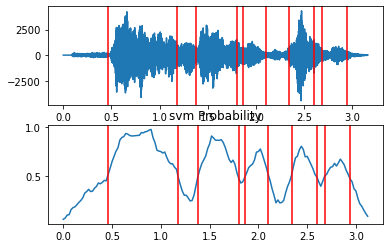

共分成 5 段
 [[0.46, 1.18], [1.3800000000000001, 1.8], [1.86, 2.1], [2.34, 2.6], [2.68, 2.94]]
講話時長共 1.9 秒


In [160]:
[Fs, x] = aIO.read_audio_file("speech/happy/56_F_H_7.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.2, weight = 0.4, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

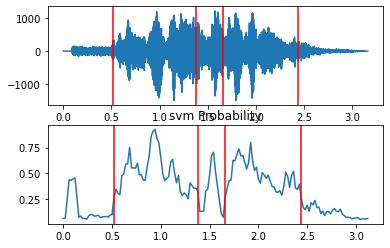

共分成 2 段
 [[0.52, 1.3800000000000001], [1.6600000000000001, 2.44]]
講話時長共 1.64 秒


In [161]:
[Fs, x] = aIO.read_audio_file("speech/happy/59_F_H_7.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.2, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

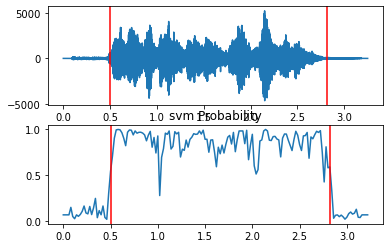

共分成 1 段
 [[0.5, 2.82]]
講話時長共 2.32 秒


In [162]:
[Fs, x] = aIO.read_audio_file("speech/happy/62_F_H_6.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.01, weight = 0.5, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

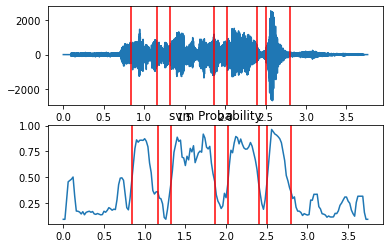

共分成 4 段
 [[0.84, 1.16], [1.32, 1.86], [2.02, 2.4], [2.5, 2.8000000000000003]]
講話時長共 1.54 秒


In [163]:
[Fs, x] = aIO.read_audio_file("speech/happy/66_F_H_6.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.3, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

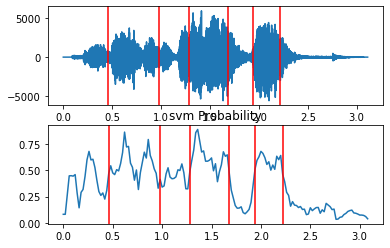

共分成 3 段
 [[0.46, 0.98], [1.28, 1.68], [1.94, 2.22]]
講話時長共 1.2000000000000002 秒


In [300]:
[Fs, x] = aIO.read_audio_file("speech/happy/68_M_H_6.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.5, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

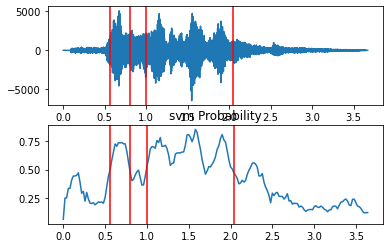

共分成 2 段
 [[0.56, 0.8], [1.0, 2.04]]
講話時長共 1.28 秒


In [301]:
[Fs, x] = aIO.read_audio_file("speech/happy/69_M_H_7.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.2, weight = 0.5, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

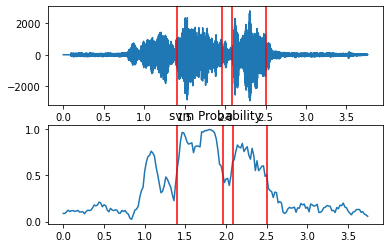

共分成 2 段
 [[1.4000000000000001, 1.96], [2.08, 2.5]]
講話時長共 0.9799999999999998 秒


In [302]:
[Fs, x] = aIO.read_audio_file("speech/happy/74_F_H_6.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.5, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

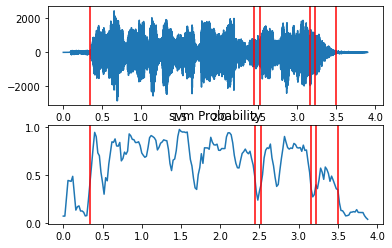

共分成 3 段
 [[0.34, 2.44], [2.52, 3.16], [3.22, 3.5]]
講話時長共 3.02 秒


In [303]:
[Fs, x] = aIO.read_audio_file("speech/happy/75_F_H_7.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.3, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

### anger

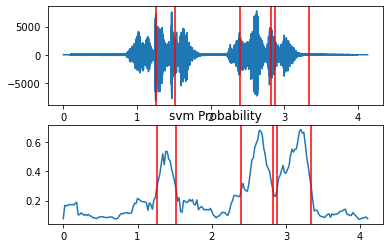

共分成 3 段
 [[1.26, 1.52], [2.4, 2.82], [2.88, 3.34]]
講話時長共 1.14 秒


In [304]:
[Fs, x] = aIO.read_audio_file("speech/anger/52_M_A_8.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.2, weight = 0.3, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

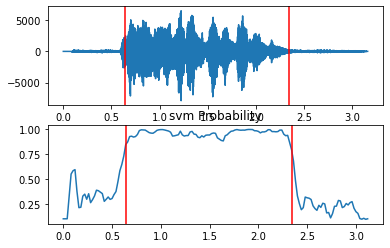

共分成 1 段
 [[0.64, 2.34]]
講話時長共 1.6999999999999997 秒


In [305]:
[Fs, x] = aIO.read_audio_file("speech/anger/54_F_A_1.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.08, weight = 0.7, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

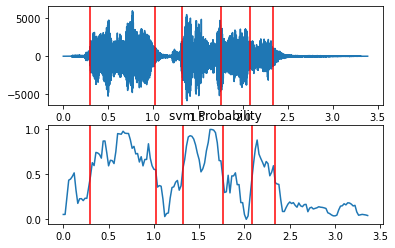

共分成 3 段
 [[0.3, 1.02], [1.32, 1.76], [2.08, 2.34]]
講話時長共 1.4199999999999997 秒


In [306]:
[Fs, x] = aIO.read_audio_file("speech/anger/54_M_A_9.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.4, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

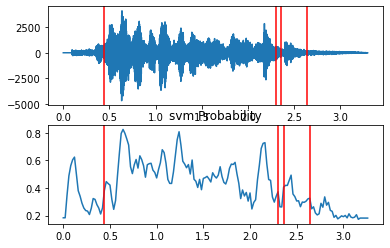

共分成 2 段
 [[0.44, 2.3000000000000003], [2.36, 2.64]]
講話時長共 2.1400000000000006 秒


In [307]:
[Fs, x] = aIO.read_audio_file("speech/anger/55_F_A_3.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.2, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

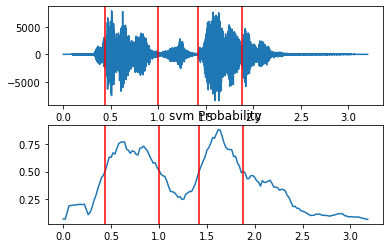

共分成 2 段
 [[0.44, 1.0], [1.42, 1.8800000000000001]]
講話時長共 1.0200000000000002 秒


In [308]:
[Fs, x] = aIO.read_audio_file("speech/anger/56_F_A_9.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.3, weight = 0.6, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

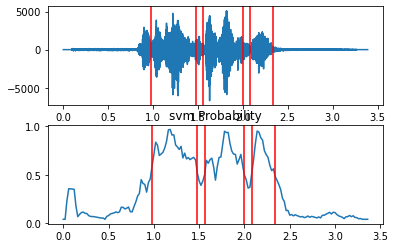

共分成 3 段
 [[0.98, 1.48], [1.56, 2.0], [2.08, 2.34]]
講話時長共 1.1999999999999997 秒


In [309]:
[Fs, x] = aIO.read_audio_file("speech/anger/60_F_A_8.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.5, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

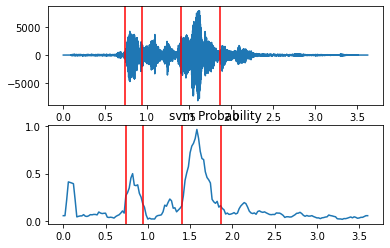

共分成 2 段
 [[0.74, 0.9400000000000001], [1.4000000000000001, 1.86]]
講話時長共 0.66 秒


In [310]:
[Fs, x] = aIO.read_audio_file("speech/anger/60_F_A_8_2.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.2, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

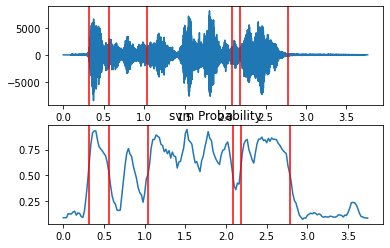

共分成 3 段
 [[0.32, 0.56], [1.04, 2.08], [2.18, 2.7800000000000002]]
講話時長共 1.8800000000000001 秒


In [311]:
[Fs, x] = aIO.read_audio_file("speech/anger/60_M_A_7.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.5, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

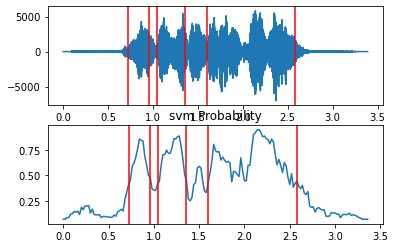

共分成 3 段
 [[0.72, 0.96], [1.04, 1.36], [1.6, 2.58]]
講話時長共 1.54 秒


In [312]:
[Fs, x] = aIO.read_audio_file("speech/anger/62_F_A_9.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.1, weight = 0.4, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

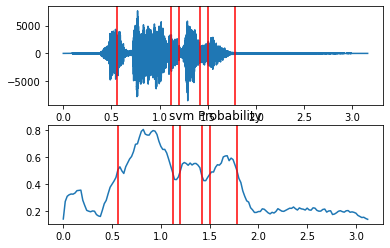

共分成 3 段
 [[0.56, 1.12], [1.2, 1.42], [1.5, 1.78]]
講話時長共 1.06 秒


In [313]:
[Fs, x] = aIO.read_audio_file("speech/anger/65_M_A_8.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 0.2, weight = 0.5, plot = True)
print("共分成",len(segments),"段\n",segments)
total = 0
for seg in segments:
    total += (seg[1]-seg[0])
print("講話時長共",total,"秒")

#### 謝謝老師和助教這學期的教導ヾ(•ω•`)o